In [147]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### Data

In [148]:
data = pd.read_csv('banking.csv', header=0)
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [149]:
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [150]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [151]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [152]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [153]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

## Data Exploratory

In [154]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

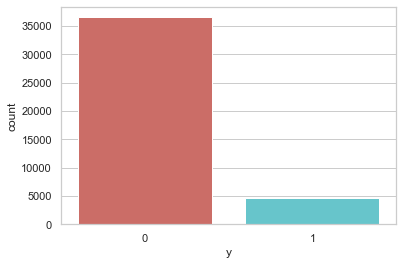

<Figure size 432x288 with 0 Axes>

In [155]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [156]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [157]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [158]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [159]:
pd.crosstab(data.job,data.y)

y,0,1
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


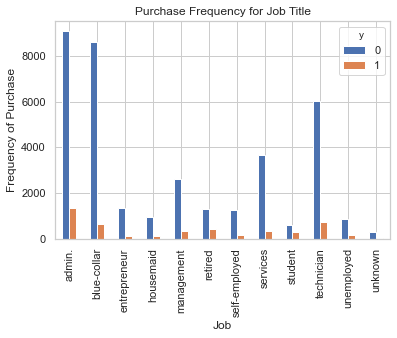

In [160]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

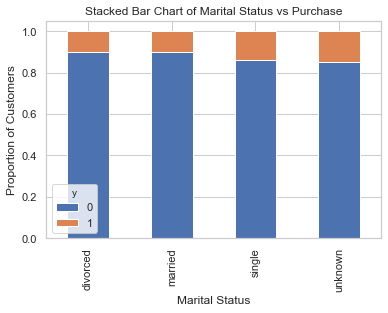

In [161]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

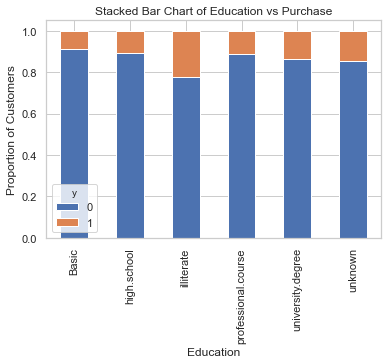

In [162]:
table = pd.crosstab(data.education, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

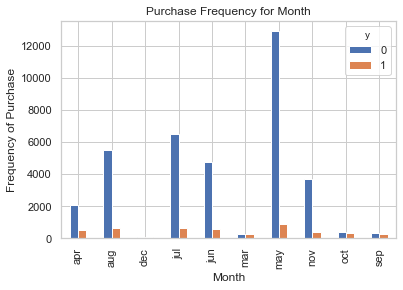

In [163]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

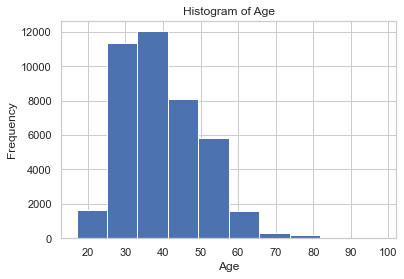

In [164]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [165]:
len(data.columns)

21

### create dummy variables

In [166]:
#Dividing data into X and y variables
X = data.drop(columns={'y'},axis=1)
y = data.pop('y')


In [167]:
X=pd.get_dummies(X)
X.shape,X.columns

((41188, 61),
 Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
        'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
        'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
        'job_management', 'job_retired', 'job_self-employed', 'job_services',
        'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
        'marital_divorced', 'marital_married', 'marital_single',
        'marital_unknown', 'education_Basic', 'education_high.school',
        'education_illiterate', 'education_professional.course',
        'education_university.degree', 'education_unknown', 'default_no',
        'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
        'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
        'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
        'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
        'month_nov', 'month_oct', 'month_sep', 'd

In [168]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test,y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

### Feature Selection

In [169]:
from sklearn import datasets
from sklearn.feature_selection import RFE # recursive feature elimination
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

In [170]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X_train)

### RFE

In [171]:
rfe = RFE(logreg, 18,step=10)

C:\Users\Rachel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=18 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [172]:
rfe = RFE(logreg, 18,step=10)
rfe = rfe.fit(X_train, y_train )
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Rachel\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Rachel\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

[False False False False  True False False False  True False False  True
 False False False  True  True False  True False False False False False
 False False False False False False False False  True False False False
 False False False False False False False  True False  True  True False
  True  True  True  True False False  True False False False  True  True
  True]
[6 6 3 6 1 3 4 4 1 5 3 1 6 6 3 1 1 3 1 5 5 6 3 4 4 6 4 4 6 4 4 2 1 2 6 5 5
 5 5 5 5 3 3 1 2 1 1 3 1 1 1 1 6 4 1 4 5 3 1 1 1]


In [173]:
X_train_rfe=X_train[X_train.columns[rfe.support_]]

In [174]:
X_test_rfe=X_test[X_test.columns[rfe.support_]]

### RFECV

In [190]:
#RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [191]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfecv = RFECV(lm,step=1, scoring='r2')
rfecv = rfecv.fit(X_train, y_train)

In [192]:
list(zip(X_train.columns,rfecv.support_,rfecv.ranking_))

[('age', True, 1),
 ('duration', True, 1),
 ('campaign', True, 1),
 ('pdays', True, 1),
 ('previous', True, 1),
 ('emp_var_rate', True, 1),
 ('cons_price_idx', True, 1),
 ('cons_conf_idx', True, 1),
 ('euribor3m', True, 1),
 ('nr_employed', True, 1),
 ('job_admin.', True, 1),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', True, 1),
 ('job_housemaid', True, 1),
 ('job_management', True, 1),
 ('job_retired', True, 1),
 ('job_self-employed', True, 1),
 ('job_services', True, 1),
 ('job_student', True, 1),
 ('job_technician', True, 1),
 ('job_unemployed', True, 1),
 ('job_unknown', True, 1),
 ('marital_divorced', True, 1),
 ('marital_married', True, 1),
 ('marital_single', True, 1),
 ('marital_unknown', True, 1),
 ('education_Basic', True, 1),
 ('education_high.school', True, 1),
 ('education_illiterate', True, 1),
 ('education_professional.course', True, 1),
 ('education_university.degree', True, 1),
 ('education_unknown', True, 1),
 ('default_no', True, 1),
 ('default_unknown', Tru

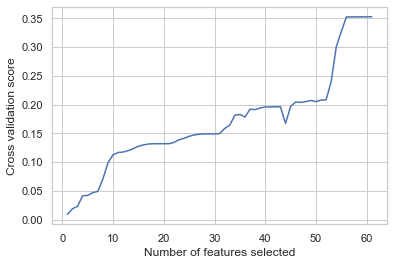

In [193]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [194]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,previous,euribor3m,job_blue-collar,job_retired,job_self-employed,job_student,default_no,month_apr,month_dec,month_jul,month_mar,month_may,month_nov,month_oct,day_of_week_mon,poutcome_failure,poutcome_nonexistent,poutcome_success
7019,1,1.266,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
27175,0,4.965,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
15817,0,4.958,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
40971,0,1.405,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
8467,0,4.962,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


### Implementing the model

In [175]:
lg.fit(X_train_rfe, y_train)

LogisticRegression()

In [176]:
y_pred=lg.predict(X_test_rfe)

In [178]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train_rfe)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.279372
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.200     
Dependent Variable:   y                 AIC:               16145.1197
Date:                 2020-11-30 23:23  BIC:               16293.9654
No. Observations:     28831             Log-Likelihood:    -8054.6   
Df Model:             17                LL-Null:           -10069.   
Df Residuals:         28813             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous              0.2199   0.0604   3.6385 0.0003  0.1014  0.3384
euribor3m       

### Logistic Regression Model Fitting

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train_rfe, y_train)

LogisticRegression()

In [181]:
y_pred = logreg.predict(X_test_rfe)

In [183]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_rfe, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


### Cross Validation

In [184]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train_rfe, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\Rachel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


10-fold cross validation average accuracy: 0.899


### Confusion Matrix

In [185]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10818   108]
 [ 1149   282]]


In [186]:
## Compute precision, recall, F-measure and support

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     10926
           1       0.72      0.20      0.31      1431

    accuracy                           0.90     12357
   macro avg       0.81      0.59      0.63     12357
weighted avg       0.88      0.90      0.87     12357



### ROC Curve

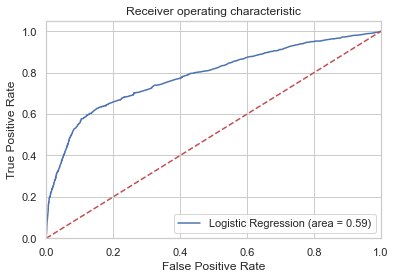

In [189]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test_rfe))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_rfe)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()